混淆矩陣：
[[11  0  1  1  0  1  1  0  2  3]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 19  0  0  3  0  0  1  2]
 [ 0  0  2  9  1  0  0  4  2  3]
 [ 1  0  1  2  8  0  0  1  1  1]
 [ 1  2  3  1  1 10  0  0  2  2]
 [ 1  0  0  4  1  0 18  0  0  1]
 [ 0  0  1  0  0  0  0 12  0  0]
 [ 1  2  3  4  4  0  0  0  8  1]
 [ 2  0  4  3  3  0  2  1  0  6]]

準確率： 0.57

分類報告：
              precision    recall  f1-score   support

       blues       0.58      0.55      0.56        20
   classical       0.76      1.00      0.87        13
     country       0.56      0.70      0.62        27
       disco       0.38      0.43      0.40        21
      hiphop       0.44      0.53      0.48        15
        jazz       0.71      0.45      0.56        22
       metal       0.86      0.72      0.78        25
         pop       0.67      0.92      0.77        13
      reggae       0.50      0.35      0.41        23
        rock       0.32      0.29      0.30        21

    accuracy                           0.57      

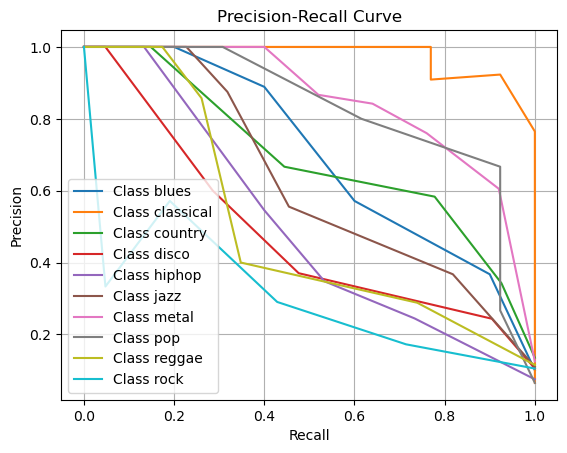

In [42]:
#KNN分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

file_path = 'data.csv'
data = pd.read_csv(file_path)

# 1. 數據準備
# 除去 'filename' 和 'label' 兩列
X = data.drop(columns=['filename', 'label'])
y = data['label']

# 80% 訓練，20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化（註：KNN對特徵標準化比較敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 訓練 KNeighborsClassifier 模型
# 設定 5 個鄰居
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 3. 預測
y_pred = knn.predict(X_test_scaled)

# 4. 效能評估
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 生成分類報告
class_report = classification_report(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出結果
print("混淆矩陣：")
print(conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：")
print(class_report)


# 將標籤二元化 (多類別問題)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = knn.predict_proba(X_test_scaled)  # 獲取預測機率

# 繪製 Precision-Recall 曲線
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Class {class_name}')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

混淆矩陣：
 [[ 5  1  2  2  1  3  1  0  2  3]
 [ 1 10  0  1  0  1  0  0  0  0]
 [ 5  0  7  4  1  5  0  2  3  0]
 [ 1  0  2  6  2  1  1  4  0  4]
 [ 0  0  1  2  7  1  1  1  0  2]
 [ 2  2  2  3  0 10  0  2  0  1]
 [ 0  0  1  1  1  0 19  0  1  2]
 [ 0  0  1  0  2  0  0  9  1  0]
 [ 1  0  4  4  2  4  1  0  7  0]
 [ 2  0  4  2  2  2  3  1  1  4]]

準確率： 0.42

分類報告：
               precision    recall  f1-score   support

       blues       0.29      0.25      0.27        20
   classical       0.77      0.77      0.77        13
     country       0.29      0.26      0.27        27
       disco       0.24      0.29      0.26        21
      hiphop       0.39      0.47      0.42        15
        jazz       0.37      0.45      0.41        22
       metal       0.73      0.76      0.75        25
         pop       0.47      0.69      0.56        13
      reggae       0.47      0.30      0.37        23
        rock       0.25      0.19      0.22        21

    accuracy                           0.42    

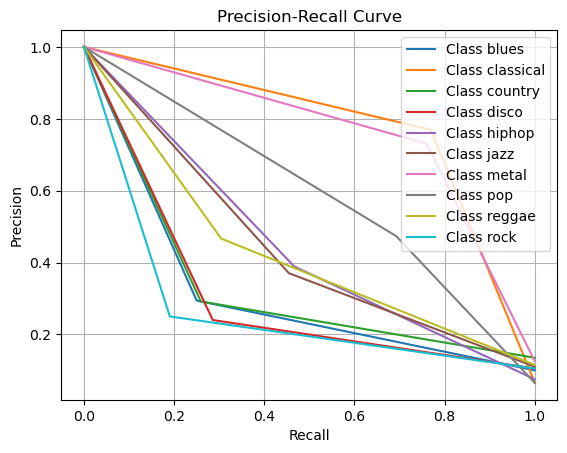

In [53]:
#決策樹分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

file_path = 'data.csv'
data = pd.read_csv(file_path)  

# 1. 數據準備
# 除去 'filename' 和 'label' 兩列
X = data.drop(columns=['filename', 'label'])
y = data['label']

# 80% 訓練，20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.建立 DecisionTreeClassifier 模型
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20,random_state=42)  
dtc.fit(X_train, y_train) 

# 3.預測
y_pred = dtc.predict(X_test)

# 4.效能評估
conf_matrix = confusion_matrix(y_test, y_pred)  # 混淆矩陣
class_report = classification_report(y_test, y_pred)  # 分類報告
accuracy = accuracy_score(y_test, y_pred)  # 準確率

print("混淆矩陣：\n", conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：\n", class_report)


# 將標籤二元化 (多類別問題)
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = dtc.predict_proba(X_test)  # 獲取預測機率

# 繪製 Precision-Recall 曲線
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Class {class_name}')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

混淆矩陣：
 [[ 3  2  3  1  0  5  6  0  0  0]
 [ 1 10  1  0  0  1  0  0  0  0]
 [ 6  2  7  0  0  3  1  5  1  2]
 [ 0  0  1  2  2  0  5  9  1  1]
 [ 0  0  1  1  3  0  2  4  4  0]
 [ 3  4  3  0  1  7  0  3  1  0]
 [ 0  0  0  0  1  0 24  0  0  0]
 [ 0  0  1  0  0  0  0 11  1  0]
 [ 0  1  2  1  3  4  0  3  5  4]
 [ 2  0  2  1  1  0  7  2  3  3]]

準確率： 0.375

分類報告：
               precision    recall  f1-score   support

       blues       0.20      0.15      0.17        20
   classical       0.53      0.77      0.62        13
     country       0.33      0.26      0.29        27
       disco       0.33      0.10      0.15        21
      hiphop       0.27      0.20      0.23        15
        jazz       0.35      0.32      0.33        22
       metal       0.53      0.96      0.69        25
         pop       0.30      0.85      0.44        13
      reggae       0.31      0.22      0.26        23
        rock       0.30      0.14      0.19        21

    accuracy                           0.38   

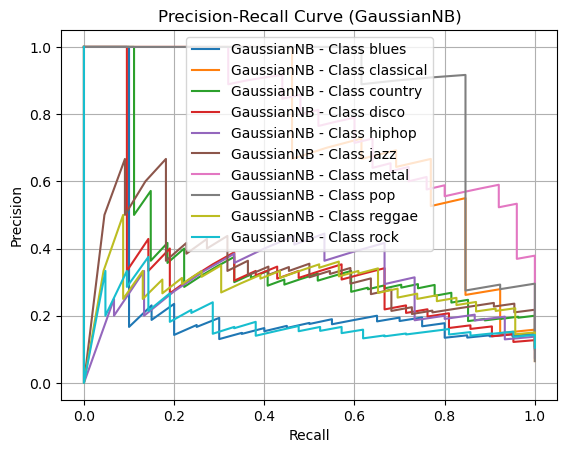

In [31]:
#高斯Naïve Bayes分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt


file_path = 'data.csv'
data = pd.read_csv(file_path)

# 1. 數據準備
# 除去 'filename' 和 'label' 兩列
X = data.drop(columns=['filename', 'label'])
y = data['label']

# 80% 訓練，20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 高斯朴素貝葉斯不需要標準化，但要比較多個模型，其他模型又對標準化敏感，所以做了
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 建立 GaussianNB 模型
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# 3. 預測
y_pred = gnb.predict(X_test_scaled)

# 4. 效能評估
# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 分類報告
class_report = classification_report(y_test, y_pred)

# 準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出評估結果
print("混淆矩陣：\n", conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：\n", class_report)


# 將標籤二元化（多類別問題）
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = gnb.predict_proba(X_test_scaled)  # 獲取預測機率

# 繪製 Precision-Recall 曲線
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'GaussianNB - Class {class_name}')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (GaussianNB)')
plt.legend(loc='best')
plt.grid()
plt.show()

混淆矩陣：
 [[11  0  1  0  0  0  2  0  3  3]
 [ 1 11  0  0  0  1  0  0  0  0]
 [ 1  0 16  0  1  2  0  0  4  3]
 [ 0  0  0 12  2  0  0  2  2  3]
 [ 1  0  0  1  9  0  0  0  4  0]
 [ 0  1  4  0  0 15  0  1  0  1]
 [ 1  0  0  1  2  0 21  0  0  0]
 [ 0  0  0  2  0  0  0 11  0  0]
 [ 1  3  2  1  3  0  0  0 12  1]
 [ 2  0  5  1  0  1  4  2  1  5]]

準確率： 0.615

分類報告：
               precision    recall  f1-score   support

       blues       0.61      0.55      0.58        20
   classical       0.73      0.85      0.79        13
     country       0.57      0.59      0.58        27
       disco       0.67      0.57      0.62        21
      hiphop       0.53      0.60      0.56        15
        jazz       0.79      0.68      0.73        22
       metal       0.78      0.84      0.81        25
         pop       0.69      0.85      0.76        13
      reggae       0.46      0.52      0.49        23
        rock       0.31      0.24      0.27        21

    accuracy                           0.61   

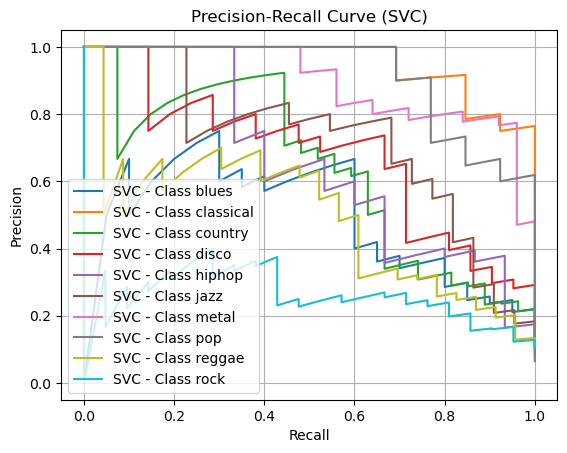

In [58]:
#SVC分類

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

# 1. 數據準備
# 除去 'filename' 和 'label' 兩列
X = data.drop(columns=['filename', 'label'])
y = data['label']

# 80% 訓練，20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化處理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 建立 SVC 模型
svc = SVC(kernel='linear', random_state=42, probability=True)   # probability=True 用於計算預測機率
svc.fit(X_train_scaled, y_train)

# 3. 預測
y_pred = svc.predict(X_test_scaled)

# 4. 效能評估
# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 分類報告
class_report = classification_report(y_test, y_pred)

# 準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出評估結果
print("混淆矩陣：\n", conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：\n", class_report)


# 將標籤二元化（多類別問題）
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = svc.predict_proba(X_test_scaled)  # 獲取預測機率

# 繪製 Precision-Recall 曲線
for i, class_name in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'SVC - Class {class_name}')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVC)')
plt.legend(loc='best')
plt.grid()
plt.show()
